In [1]:
#Uzun Ömürlü Kısa Dönem Belleği (Long Short-term memory neural networks)

In [10]:
from keras.layers import Embedding, LSTM
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.preprocessing import sequence
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
num_words = 5000 #en çok kullandığım kelimeleri çekicez
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=num_words)

In [4]:
max_kelime = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen = max_kelime)
print('Eğitim Kümesinin son hali: \n',X_train)

Eğitim Kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [5]:
ky_vektor_uzunlugu = 32
model = Sequential()
model.add(Embedding(num_words, ky_vektor_uzunlugu))
model.add(LSTM(64))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          160000    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 184,897
Trainable params: 184,897
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2
)

Epoch 1/10
40/40 [==============================] - 139s 3s/step - loss: 0.6531 - accuracy: 0.6279 - val_loss: 0.5213 - val_accuracy: 0.7944
Epoch 2/10
40/40 [==============================] - 201s 5s/step - loss: 0.4194 - accuracy: 0.8277 - val_loss: 0.3589 - val_accuracy: 0.8464
Epoch 3/10
40/40 [==============================] - 143s 4s/step - loss: 0.3068 - accuracy: 0.8757 - val_loss: 0.3214 - val_accuracy: 0.8636
Epoch 4/10
40/40 [==============================] - 125s 3s/step - loss: 0.2428 - accuracy: 0.9074 - val_loss: 0.3027 - val_accuracy: 0.8750
Epoch 5/10
40/40 [==============================] - 128s 3s/step - loss: 0.2083 - accuracy: 0.9226 - val_loss: 0.2991 - val_accuracy: 0.8796
Epoch 6/10
40/40 [==============================] - 118s 3s/step - loss: 0.1804 - accuracy: 0.9354 - val_loss: 0.4001 - val_accuracy: 0.8674
Epoch 7/10
40/40 [==============================] - 115s 3s/step - loss: 0.1697 - accuracy: 0.9416 - val_loss: 0.3228 - val_accuracy: 0.8752
Epoch 8/10
40

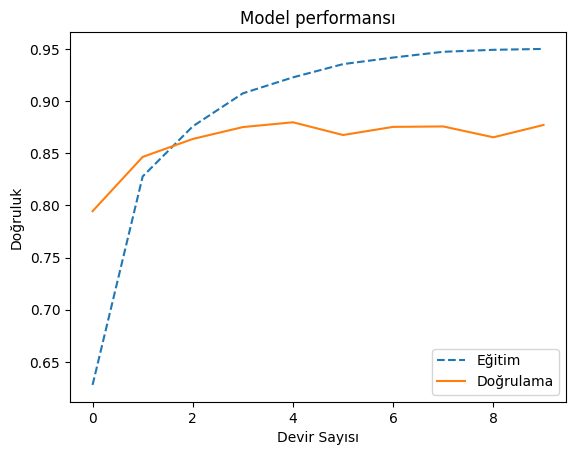

In [11]:
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model performansı")
plt.xlabel("Devir Sayısı")
plt.ylabel("Doğruluk")
plt.legend(["Eğitim", "Doğrulama"], loc = "lower right")
plt.show()

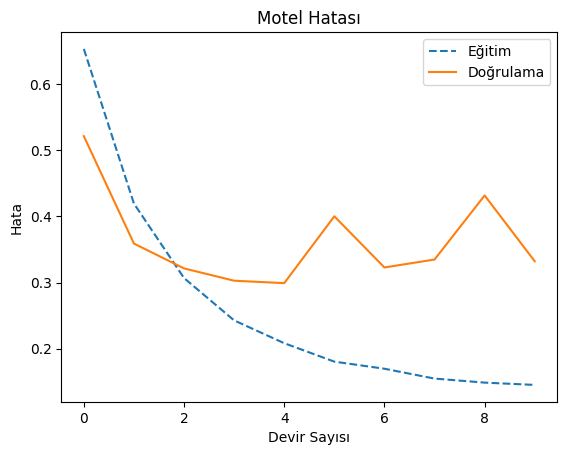

In [12]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Motel Hatası")
plt.xlabel("Devir Sayısı")
plt.ylabel("Hata")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper right")
plt.show()

In [13]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin test performansı : %.2f%%" % (performans[1]*100))

Modelin test performansı : 86.51%
